In [1]:
import glob
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

path = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/4gRNA'
files = glob.glob(f"{path}/*4gRNAs*DF.csv")

file_names = [os.path.basename(f) for f in files]

# Simulated Correlation

In [2]:
# Simulated File
act_fit = '/Users/olivia.rourke/Desktop/Berkley/simulation output new/4 gRNAs 25% overlap-biased10000Cells-10_Pbind_0.25_Pmut_1.txt'
pbam_fit = '/Users/olivia.rourke/Desktop/Berkley/simulation output new/4 gRNAs 25% overlap-biased10000Cells-10_Pbind_0.05_Pmut_0.75.txt'

df_fit = pd.read_csv(pbam_fit, header=None)  # CHANGE FILE NAME
df_fit = df_fit[0].apply(list).apply(pd.Series)

# Make simulated file same length
start_zeros = pd.DataFrame(np.zeros((df_fit.shape[0], 15), dtype=int))
end_zeros = pd.DataFrame(np.zeros((df_fit.shape[0], 75), dtype=int))
df_fit = pd.concat([start_zeros, df_fit, end_zeros], axis=1)
# print(df_fit.shape)

# ref_file
act = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/act5C-AID162_GFPx4gRNAs_F2_adults_from_males_merged.fastq.gz_DF.csv'
pbam = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/pBam-AID162-1_GFPx4gRNAs_F2_adults_from_males_merged.fastq.gz_DF.csv'

df = pd.read_csv(pbam)  # CHANGE FILE NAME

# Extract reference values
ref = df.iloc[0]
end = len(df.columns) - 4  # last 4 entries are ID
ref_values = ref.iloc[1:end].values  # Adjust slicing here
print(ref_values)

# Initialize lists
dfs = []  # DataFrames with mutable bases for each gRNA slice
binary_matrices = []  # 0 is a match 1 is a mutation

grna_slices = [
    (53, 73),
    (104, 124),
    (119, 142),
    (149, 170)
]

for i, (start, end) in enumerate(grna_slices):
    mutable_positions = []  # Positions that are mutable in each gRNA slice

    for pos in range(start, end):
        if (i < 2 and ref_values[pos] == 2):  # Cs in gRNA slices 1 and 2
            mutable_positions.append(pos)
        elif (i >= 2 and ref_values[pos] == 4):  # Gs in gRNA slices 3 and 4
            mutable_positions.append(pos)

    # Extract mutable positions from simulated data
    mutable_bases_df = df_fit.iloc[:, mutable_positions]
    dfs.append(mutable_bases_df)

    # Create the binary matrix
    binary_matrix = np.zeros((df_fit.shape[0], len(mutable_positions)), dtype=int)

    for j, pos in enumerate(mutable_positions):
        column_values = mutable_bases_df.iloc[:, j].values

        if i < 2:  # gRNA 1 and 2
            binary_matrix[:, j] = (column_values == '*').astype(int)  # 1 if sequence value is '*'
        else:  # gRNA 3 and 4
            binary_matrix[:, j] = (column_values == '*').astype(int)  # 1 if sequence value is '*'

    binary_matrices.append(binary_matrix)
    print(mutable_positions)
# Print the binary matrices
for i, (grna_df, binary_matrix) in enumerate(zip(dfs, binary_matrices)):
    ones_count = np.sum(binary_matrix, axis=0)
    print(f"gRNA slice {i + 1}:")
    print(f"Binary matrix shape: {binary_matrix.shape}")
    print(f"Mutations in each mutable basis: {ones_count}")

[3 4 2 3 3 2 1 4 2 2 4 2 3 1 2 2 2 2 4 1 2 2 1 2 1 3 4 1 1 4 2 1 4 2 1 2 4
 1 2 3 3 2 3 3 2 1 1 4 3 2 2 4 2 2 1 3 4 2 2 2 4 1 1 4 4 2 3 1 2 4 3 2 2 1
 4 4 1 4 2 4 2 1 2 2 1 3 2 3 3 2 3 3 2 1 1 4 4 1 2 4 1 2 4 4 2 1 1 2 3 1 2
 1 1 4 1 2 2 2 4 2 4 2 2 4 1 4 4 3 4 1 1 4 3 3 2 4 1 4 4 4 2 4 1 2 1 2 2 2
 3 4 4 3 4 1 1 2 2 4 2 1 3 2 4 1 4 2 3 4 1 1 4 4 4 2 1 3 2 4 1 2 3 3 2 1 1
 4 4 1 4 4 1 2 4 4 2 1 1 2 1 3 2 2 3 4 4 4 4 2 1 2 1 1 4 2 3 4 4 1 4 3 1 2
 1 1 2 3 1 2 1 1 2 1 4 2 2 1 2 1 1 2 4 3 2 3 1 3 1 3 2 1 3 4 4 2 2 4 1 2 1
 1 4 2 1 4 1 1 4 1 1 2 4 4 2 1 3 2 1]
[53, 57, 58, 59, 65, 68, 71, 72]
[104, 107, 110, 115, 116, 117, 119, 121, 122]
[120, 123, 125, 126, 128, 131, 135, 137, 138, 139, 141]
[149, 150, 152, 157, 162, 164, 167]
gRNA slice 1:
Binary matrix shape: (10000, 8)
Mutations in each mutable basis: [1013 1625 1612 1615  687  104   17    0]
gRNA slice 2:
Binary matrix shape: (10000, 9)
Mutations in each mutable basis: [1006 1627 1689 1049  643  404  124   33   16]
gRNA slice 3:
Binar

# Real Data Correlation

In [3]:
# In binary 

act = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/act5C-AID162_GFPx4gRNAs_F2_adults_from_males_merged.fastq.gz_DF.csv'
pbam = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/pBam-AID162-1_GFPx4gRNAs_F2_adults_from_males_merged.fastq.gz_DF.csv'

df = pd.read_csv(pbam)  # CHANGE FILE NAME
df = df.iloc[:,1:-1]

# Extract reference values and sequence matrix
ref = df.iloc[0]
end = len(df.columns) - 4  # last 4 entries are ID
ref_values = ref.iloc[0:end].values
print(ref_values)

grna_slices = [
    (53, 73),
    (104, 124),
    (119, 142),
    (149, 170)
]

dfs = []  # DataFrames with mutable bases for each gRNA slice
binary_matrices_real = []  # Binary matrices indicating matches/mismatches for each gRNA slice 0 is a match 1 is a mutation

for i, (start, end) in enumerate(grna_slices):
    mutable_positions = []  # Positions that are mutable in each gRNA slice

    for pos in range(start, end):
        if (i < 2 and ref_values[pos] == 2):  # Cs in gRNA slices 1 and 2
            mutable_positions.append(pos)
        elif (i >= 2 and ref_values[pos] == 4):  # Gs in gRNA slices 3 and 4
            mutable_positions.append(pos)

    # mutable_bases_df = df.iloc[:, [0] + [pos + 1 for pos in mutable_positions]]  # Include the ID column
    mutable_bases_df = df.iloc[:, mutable_positions]
    dfs.append(mutable_bases_df)

    # Create the binary matrix
    binary_matrix = np.zeros(mutable_bases_df.shape, dtype=int)
    
    for j, pos in enumerate(mutable_positions):
        
        column_values = mutable_bases_df.iloc[:, j].values  # +1 to skip ID column
        
        if i < 2:  # gRNA 1 and 2
            binary_matrix[:, j] = (column_values == 3).astype(int)  # 1 if sequence value is 3
        else:  # gRNA 3 and 4
            binary_matrix[:, j] = (column_values == 1).astype(int)  # 1 if sequence value is 1

    binary_matrices_real.append(binary_matrix)

# Print the binary matrices
for i, (grna_df, binary_matrix) in enumerate(zip(dfs, binary_matrices_real)):
    ones_count = np.sum(binary_matrix, axis=0)
    print(ones_count)
    # print(len(binary_matrix))
    # print((ones_count/len(binary_matrix)))


[3 4 2 3 3 2 1 4 2 2 4 2 3 1 2 2 2 2 4 1 2 2 1 2 1 3 4 1 1 4 2 1 4 2 1 2 4
 1 2 3 3 2 3 3 2 1 1 4 3 2 2 4 2 2 1 3 4 2 2 2 4 1 1 4 4 2 3 1 2 4 3 2 2 1
 4 4 1 4 2 4 2 1 2 2 1 3 2 3 3 2 3 3 2 1 1 4 4 1 2 4 1 2 4 4 2 1 1 2 3 1 2
 1 1 4 1 2 2 2 4 2 4 2 2 4 1 4 4 3 4 1 1 4 3 3 2 4 1 4 4 4 2 4 1 2 1 2 2 2
 3 4 4 3 4 1 1 2 2 4 2 1 3 2 4 1 4 2 3 4 1 1 4 4 4 2 1 3 2 4 1 2 3 3 2 1 1
 4 4 1 4 4 1 2 4 4 2 1 1 2 1 3 2 2 3 4 4 4 4 2 1 2 1 1 4 2 3 4 4 1 4 3 1 2
 1 1 2 3 1 2 1 1 2 1 4 2 2 1 2 1 1 2 4 3 2 3 1 3 1 3 2 1 3 4 4 2 2 4 1 2 1
 1 4 2 1 4 1 1 4 1 1 2 4 4 2 1 3 2]
[167 419 624 642 156   5   7   2]
[ 119 1126 1070   12   17   12    3    6    4]
[   8    7    7    7 1030  684 1632 1624 1618 1618  535]
[   5    6    7  568 2335 1946 2028]


# Permutations for Probability

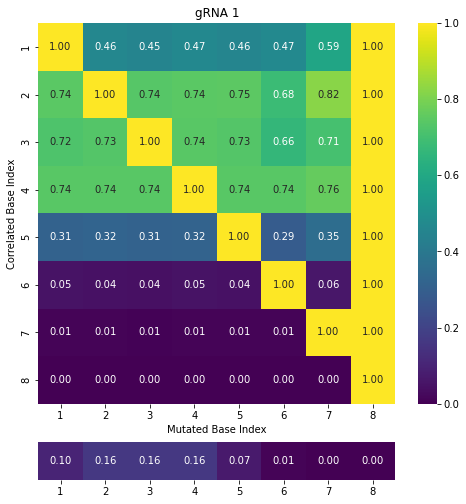

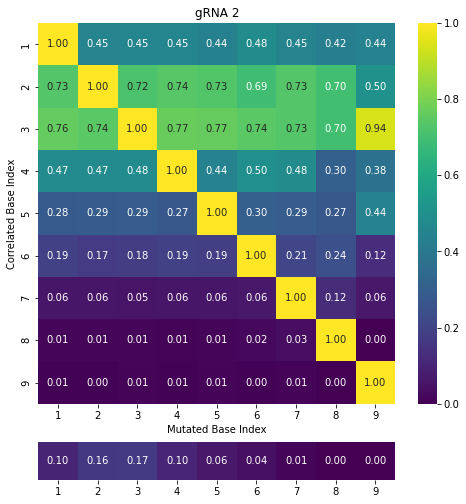

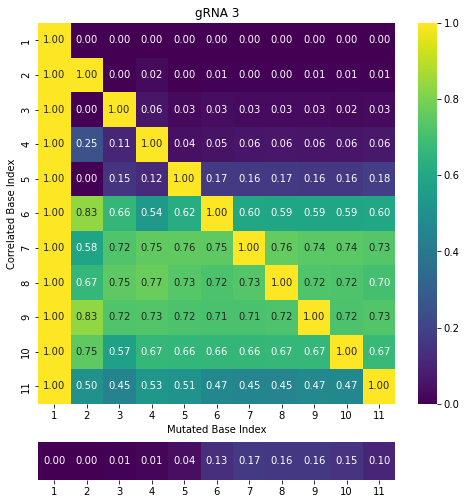

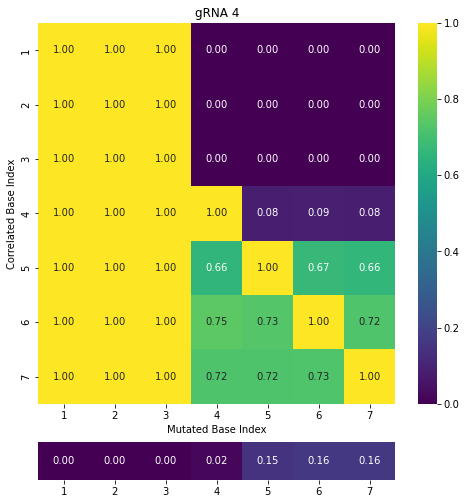

In [4]:
# sig figs
def calculate_conditional_frequencies(binary_matrix):
    num_bases = binary_matrix.shape[1]
    conditional_frequencies = np.zeros((num_bases, num_bases))  # Initialize

    for i in range(num_bases):  # Mutated base
        for j in range(num_bases):  # Other bases correlation
            base_i_mutated = binary_matrix[:, i] == 1  # Reads where base i is mutated
            base_j_mutated = binary_matrix[:, j] == 1  # Reads where base j is mutated
            
            if np.sum(base_i_mutated) == 0:
                conditional_frequencies[i, j] = 1 #if base is never muated throw 1 (1 is subrtacted and if - diff is 0) 
            
            else: 
                conditional_frequencies[i, j] = np.sum(base_i_mutated & base_j_mutated) / np.sum(base_i_mutated)

    # Convert to DataFrame for easier manipulation
    conditional_frequencies_df = pd.DataFrame(conditional_frequencies)

    # Shift index to start from 1
    conditional_frequencies_df.index = conditional_frequencies_df.index + 1

    return conditional_frequencies_df

# For each gRNA
for i, binary_matrix in enumerate(binary_matrices):
    conditional_frequencies = calculate_conditional_frequencies(binary_matrix)
    conditional_frequencies = np.transpose(conditional_frequencies)
    
    # Mutation Rate: 
    ones_count = np.sum(binary_matrix, axis=0)
    mut_rate = ones_count / len(binary_matrix)
    # print(mut_rate)
    
    # Create the main heatmap
    plt.figure(figsize=(8, 7))
    ax = sns.heatmap(conditional_frequencies, annot=True, fmt=".2f", cmap='viridis', cbar=True)
    
    # Adjust axis labels to start from 1
    ax.set_xticklabels(np.arange(1, conditional_frequencies.shape[1] + 1))
    ax.set_yticklabels(np.arange(1, conditional_frequencies.shape[0] + 1))
    
    plt.xlabel('Mutated Base Index')
    plt.ylabel('Correlated Base Index')
    plt.title(f'gRNA {i + 1}')
    
    # mutation rate mini heatmap
    ax_mini_heatmap = ax.inset_axes([0, -0.2, 1, 0.1], transform=ax.transAxes)  # [x, y, width, height]

    # Create a 2D array for the mini heatmap (1 row with mut_rate values)
    mut_rate_2d = mut_rate.reshape(1, -1)
   
    # plot baby heatmap of mut rate
    sns.heatmap(mut_rate_2d, annot=True, fmt=".2f", cmap='viridis', cbar=False, 
                ax=ax_mini_heatmap, xticklabels=np.arange(1, len(mut_rate) + 1),
                yticklabels=['Mutation Rate'], annot_kws={"size": 10},
                vmin=0, vmax=1)
    
    # Adjust the tick labels for the mini heatmap
    ax_mini_heatmap.set_xticklabels(np.arange(1, len(mut_rate) + 1))
    ax_mini_heatmap.set_yticklabels([''])
    
    # Hide the y-axis label on the mini heatmap
    ax_mini_heatmap.yaxis.set_visible(False)
    
    plt.show()

    #SIMULATED DATA

# New stuff

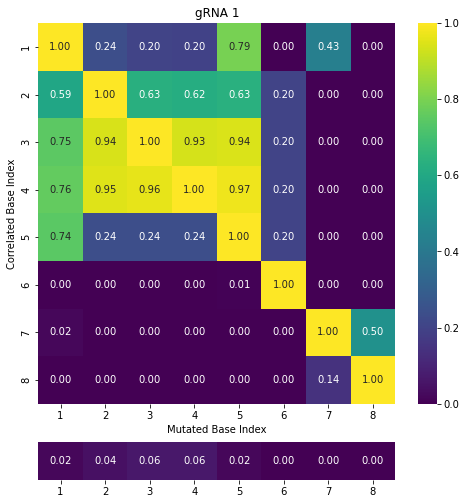

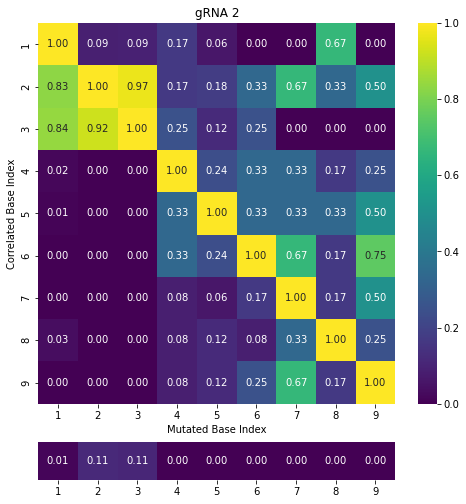

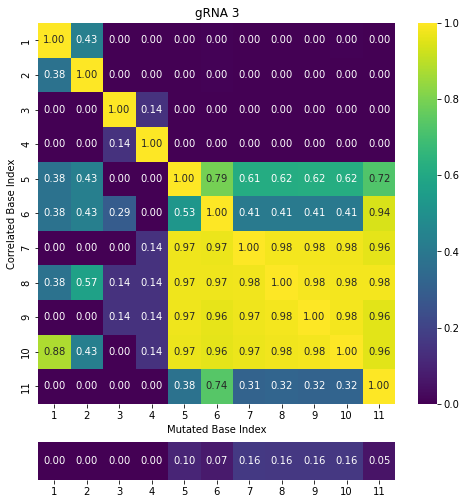

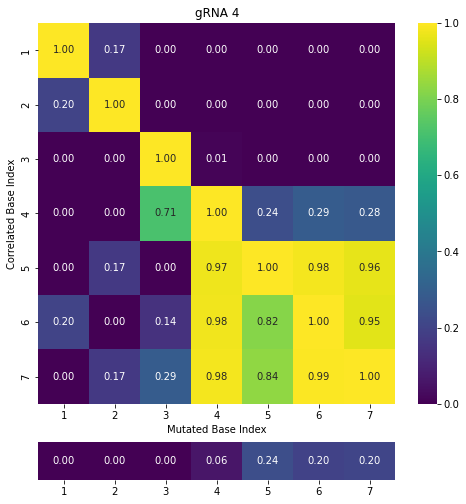

In [5]:
# For each gRNA
for i, binary_matrix in enumerate(binary_matrices_real):
    conditional_frequencies = calculate_conditional_frequencies(binary_matrix)
    conditional_frequencies = np.transpose(conditional_frequencies)
    
    # Mutation Rate: 
    ones_count = np.sum(binary_matrix, axis=0)
    mut_rate = ones_count / len(binary_matrix)
    # print(mut_rate)
    
    # Create the main heatmap
    plt.figure(figsize=(8, 7))
    ax = sns.heatmap(conditional_frequencies, annot=True, fmt=".2f", cmap='viridis', cbar=True)
    
    # Adjust axis labels to start from 1
    ax.set_xticklabels(np.arange(1, conditional_frequencies.shape[1] + 1))
    ax.set_yticklabels(np.arange(1, conditional_frequencies.shape[0] + 1))
    
    plt.xlabel('Mutated Base Index')
    plt.ylabel('Correlated Base Index')
    plt.title(f'gRNA {i + 1}')
    
    # mutation rate mini heatmap
    ax_mini_heatmap = ax.inset_axes([0, -0.2, 1, 0.1], transform=ax.transAxes)  # [x, y, width, height]

    # Create a 2D array for the mini heatmap (1 row with mut_rate values)
    mut_rate_2d = mut_rate.reshape(1, -1)
   
    # plot baby heatmap of mut rate
    sns.heatmap(mut_rate_2d, annot=True, fmt=".2f", cmap='viridis', cbar=False, 
                ax=ax_mini_heatmap, xticklabels=np.arange(1, len(mut_rate) + 1),
                yticklabels=['Mutation Rate'], annot_kws={"size": 10},
                vmin=0, vmax=1)
    
    # Adjust the tick labels for the mini heatmap
    ax_mini_heatmap.set_xticklabels(np.arange(1, len(mut_rate) + 1))
    ax_mini_heatmap.set_yticklabels([''])
    
    # Hide the y-axis label on the mini heatmap
    ax_mini_heatmap.yaxis.set_visible(False)
    
    plt.show()

# REAL DATA

## Subtracting "background" and extracting a value

0.03508770325679176
0.06256893970337535
0.08961487458926301
0.05474892423007338


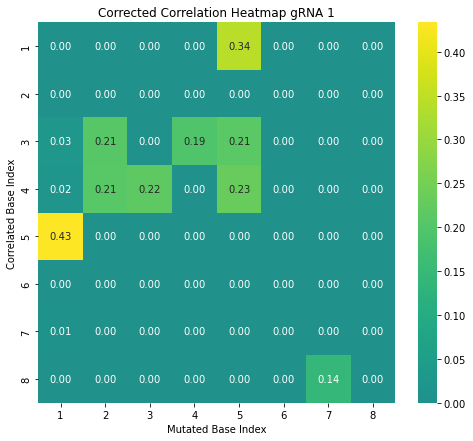

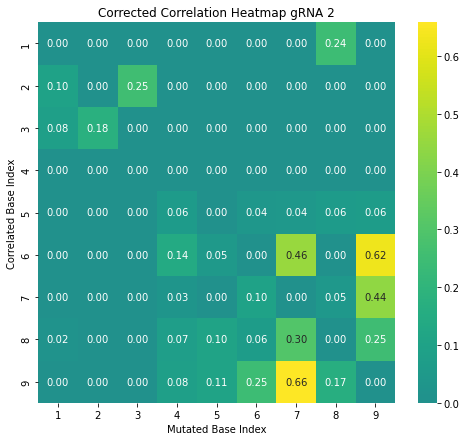

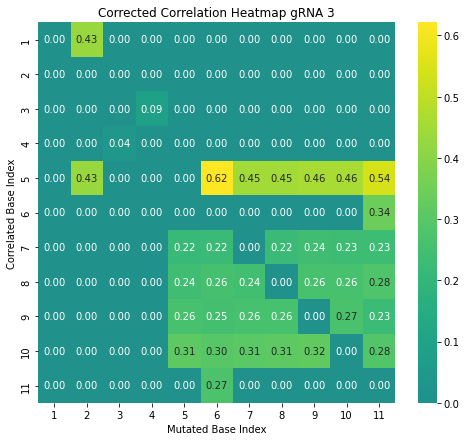

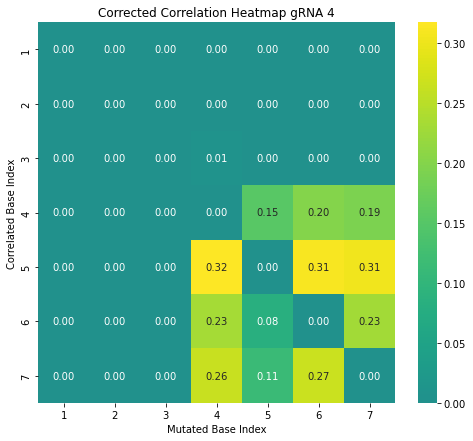

In [6]:
# For each gRNA
for i, (binary_matrix_real, binary_matrix_sim) in enumerate(zip(binary_matrices_real, binary_matrices)):
    # Calculate conditional frequencies for both real and simulated matrices
    conditional_frequencies_real = calculate_conditional_frequencies(binary_matrix_real)
    conditional_frequencies_real = np.transpose(conditional_frequencies_real)
    
    conditional_frequencies_sim = calculate_conditional_frequencies(binary_matrix_sim)
    conditional_frequencies_sim = np.transpose(conditional_frequencies_sim)
    
    # Perform element-wise subtraction
    # If theoretical correlation is greater than experimental entry will become a 0.
    # conditional_frequencies_diff = conditional_frequencies_real - conditional_frequencies_sim
    conditional_frequencies_diff = np.maximum(conditional_frequencies_real - conditional_frequencies_sim, 0) 

    
    # Mutation Rate (for real matrix):
    ones_count_real = np.sum(binary_matrix_real, axis=0)
    mut_rate_real = ones_count_real / len(binary_matrix_real)
    
    # Create the main heatmap for the difference
    plt.figure(figsize=(8, 7))
    ax = sns.heatmap(conditional_frequencies_diff, annot=True, fmt=".2f", cmap='viridis', center=0, cbar=True)
    
    # Adjust axis labels to start from 1
    ax.set_xticklabels(np.arange(1, conditional_frequencies_diff.shape[1] + 1))
    ax.set_yticklabels(np.arange(1, conditional_frequencies_diff.shape[0] + 1))
    
    plt.xlabel('Mutated Base Index')
    plt.ylabel('Correlated Base Index')
    plt.title(f'Corrected Correlation Heatmap gRNA {i + 1}')
    
    ### Plots real data mutation Rate 
    
#     # mutation rate mini heatmap
#     ax_mini_heatmap = ax.inset_axes([0, -0.2, 1, 0.1], transform=ax.transAxes)  # [x, y, width, height]

#     # Create a 2D array for the mini heatmap (1 row with mut_rate_real values)
#     mut_rate_real_2d = mut_rate_real.reshape(1, -1)
   
#     # plot baby heatmap of real mutation rate
#     sns.heatmap(mut_rate_real_2d, annot=True, fmt=".2f", cmap='viridis', cbar=False, 
#                 ax=ax_mini_heatmap, xticklabels=np.arange(1, len(mut_rate_real) + 1),
#                 yticklabels=['Mutation Rate'], annot_kws={"size": 10},
#                 vmin=0, vmax=1)
    
#     # Adjust the tick labels for the mini heatmap
#     ax_mini_heatmap.set_xticklabels(np.arange(1, len(mut_rate_real) + 1))
#     ax_mini_heatmap.set_yticklabels([''])
    
#     # Hide the y-axis label on the mini heatmap
#     ax_mini_heatmap.yaxis.set_visible(False)
    
#     plt.show()
    
    ####
    
    # print(conditional_frequencies_diff)
    
    column_averages = conditional_frequencies_diff.mean()
    # print(column_averages)
    
    average = column_averages.mean()
    print(average)